# **Tutorial 4: Feature Extraction and Visualization**

##1. Import all the required libraries

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import models, transforms, utils
from torchvision.models.feature_extraction import get_graph_node_names
from torchvision.models.feature_extraction import create_feature_extractor
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image
import json
import time

import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## 2. Load an example

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=0., std=1.)
])

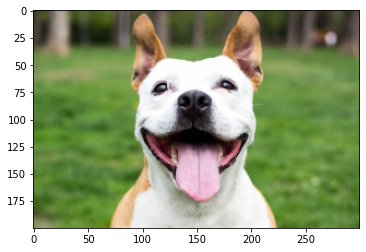

In [ ]:
image = Image.open(str('/content/dog.jpg'))
plt.imshow(image)

In [ ]:
image = transform(image)
print(f"Image shape before: {image.shape}")
image = image.unsqueeze(0)
print(f"Image shape after: {image.shape}")
image = image.to(device)

Image shape before: torch.Size([3, 224, 224])
Image shape after: torch.Size([1, 3, 224, 224])


## 3. Load Model

In [ ]:
model = models.resnet50(pretrained=True)
model.to(device)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
from torchsummary import summary
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

## 4. Extract Feature

### 4.1 Feature Extraction (New)

In [ ]:
train_nodes, eval_nodes = get_graph_node_names(model)
train_nodes

['x',
 'conv1',
 'bn1',
 'relu',
 'maxpool',
 'layer1.0.conv1',
 'layer1.0.bn1',
 'layer1.0.relu',
 'layer1.0.conv2',
 'layer1.0.bn2',
 'layer1.0.relu_1',
 'layer1.0.conv3',
 'layer1.0.bn3',
 'layer1.0.downsample.0',
 'layer1.0.downsample.1',
 'layer1.0.add',
 'layer1.0.relu_2',
 'layer1.1.conv1',
 'layer1.1.bn1',
 'layer1.1.relu',
 'layer1.1.conv2',
 'layer1.1.bn2',
 'layer1.1.relu_1',
 'layer1.1.conv3',
 'layer1.1.bn3',
 'layer1.1.add',
 'layer1.1.relu_2',
 'layer1.2.conv1',
 'layer1.2.bn1',
 'layer1.2.relu',
 'layer1.2.conv2',
 'layer1.2.bn2',
 'layer1.2.relu_1',
 'layer1.2.conv3',
 'layer1.2.bn3',
 'layer1.2.add',
 'layer1.2.relu_2',
 'layer2.0.conv1',
 'layer2.0.bn1',
 'layer2.0.relu',
 'layer2.0.conv2',
 'layer2.0.bn2',
 'layer2.0.relu_1',
 'layer2.0.conv3',
 'layer2.0.bn3',
 'layer2.0.downsample.0',
 'layer2.0.downsample.1',
 'layer2.0.add',
 'layer2.0.relu_2',
 'layer2.1.conv1',
 'layer2.1.bn1',
 'layer2.1.relu',
 'layer2.1.conv2',
 'layer2.1.bn2',
 'layer2.1.relu_1',
 'layer2.

Get layers which are Convolutional 2D

In [ ]:
def get_conv2d_layers(model):
    conv2d_name_layers = []
    conv2d_module_layers = []
    for name, module in model.named_modules():
        if isinstance(module, torch.nn.Conv2d):
            conv2d_name_layers.append(name)
            conv2d_module_layers.append(module)
    return conv2d_name_layers, conv2d_module_layers

conv_name_layers, conv_module_layers = get_conv2d_layers(model)

In [ ]:
def new_visualize_feature_map(model, return_nodes, image):
    # create_feature_extractor is a function that will extract the specified feature maps from the model
    feat_ext = create_feature_extractor(model, return_nodes=return_nodes)

    # No gradients are required when using this function
    with torch.no_grad():
        # pass the input image through the feature extractor
        out = feat_ext(image)

    # Create a figure with 8x8 subplots
    fig, ax = plt.subplots(8, 8, figsize=(25, 20))
    plt.suptitle("New Method", fontsize=30, fontweight='bold')

    # Iterate through the specified layers
    for k, layer in enumerate(return_nodes):
        # Convert 3D tensor to 2D by summing the same element of every channel
        # ex: [64, 112, 112] -> [112, 112]
        feat_maps = out[layer].sum(dim=1).cpu().numpy().squeeze(0)    

        # Compute the row and column of the current subplot
        i, j = k // 8, k % 8

        # Plot the feature maps as a heatmap on the current subplot
        sns.heatmap(feat_maps, ax=ax[i][j], cbar=False, cmap="Greens")

        # Remove the x and y ticks
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])

        # Add a title to the current subplot with the layer name and the shape of the feature maps
        ax[i][j].set_title(f'{layer}: ({feat_maps.shape[0]} x {feat_maps.shape[1]})')

Execution time: 47.50548076629639 seconds


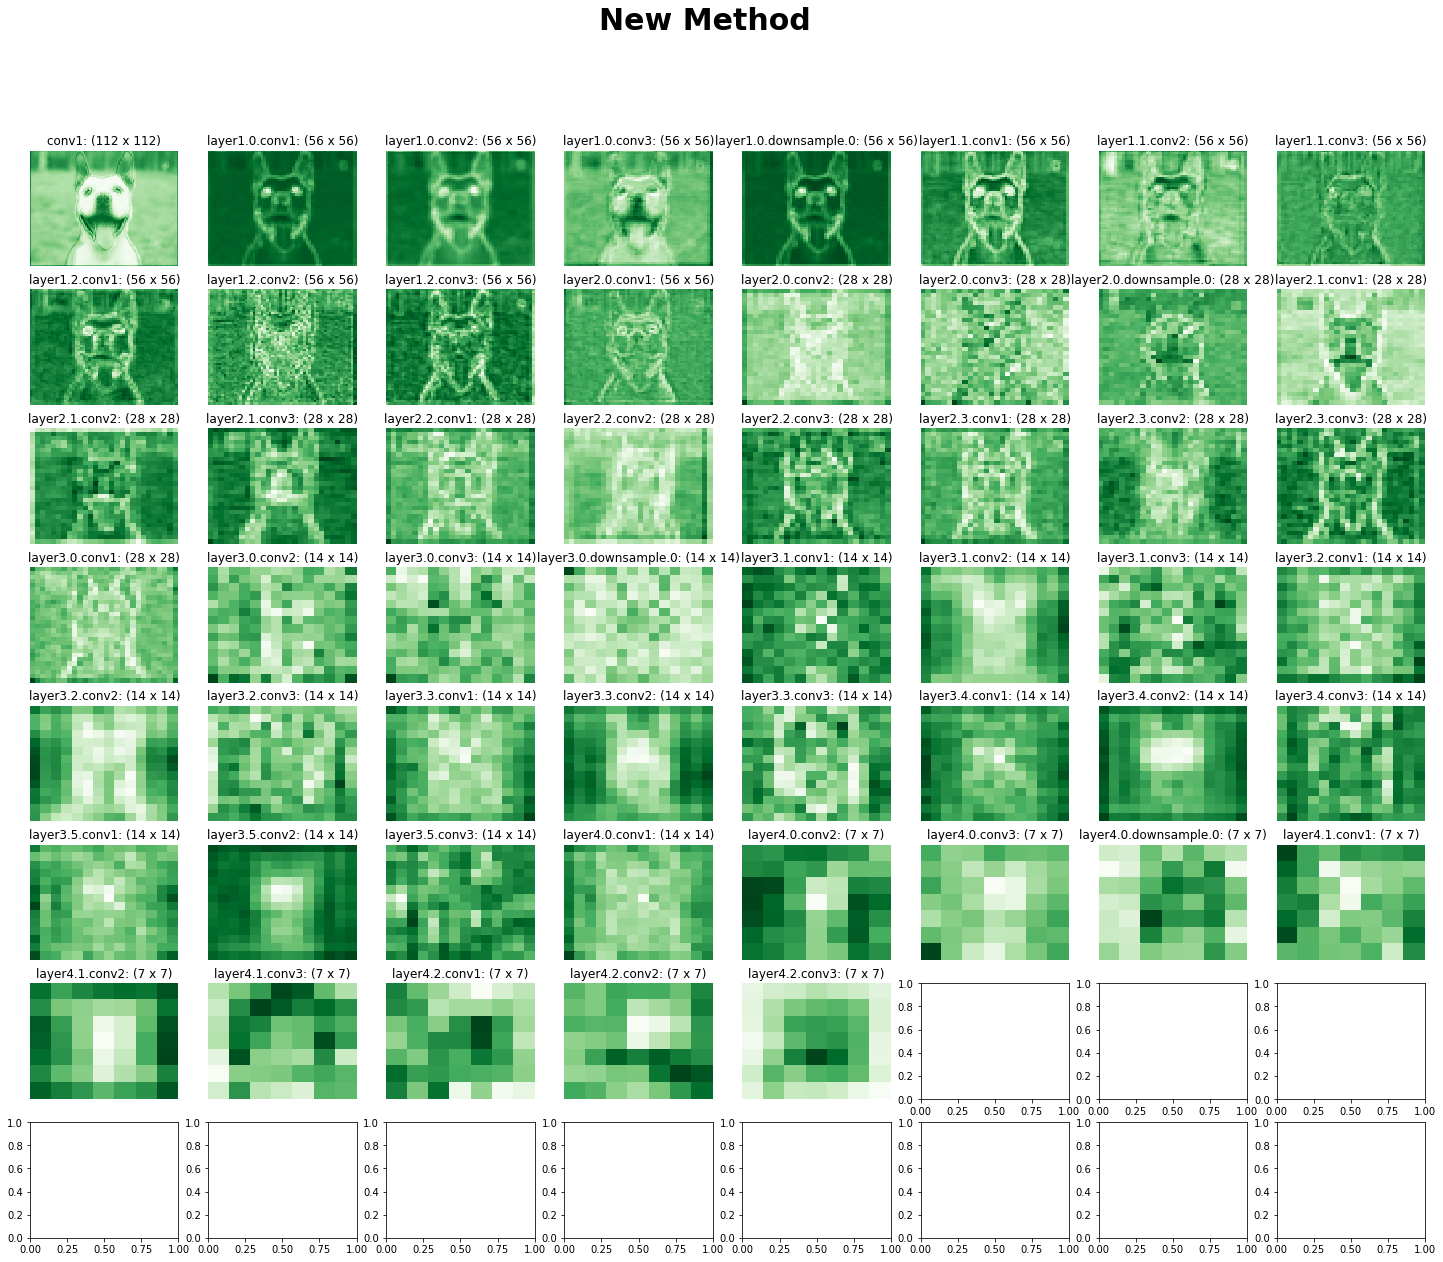

In [ ]:
start_time = time.time()
new_visualize_feature_map(model, conv_name_layers, image)
end_time = time.time()

execution_time = end_time - start_time
print(f'Execution time: {execution_time} seconds')

### 4.2 Feature Extraction (Old)

In [ ]:
def old_visualize_feature_map(model, image):
    feature_maps = []

    def hook(module, input, output):
      # Append the feature map to the list of feature maps
      feature_map = output.sum(dim=1).detach().cpu().numpy().squeeze(0)
      feature_maps.append(feature_map)

    handles = []
    # Get a list of all the conv2d layers in the model
    for layer in conv_module_layers:
      # Register a forward hook on each conv2d layer
      handle = layer.register_forward_hook(hook)
      handles.append(handle)

    # Run the model on the input image
    model(image)

    # Create a figure with 8x8 subplots
    fig, ax = plt.subplots(8, 8, figsize=(25, 20))
    plt.suptitle("Old Method", fontsize=30, fontweight='bold')
    # Iterate through the feature maps and plot them
    for k, feature_map in enumerate(feature_maps):
          i, j = k // 8, k % 8
          # Plot the feature map on the corresponding subplot
          sns.heatmap(feature_map, ax=ax[i][j], cbar=False, cmap="Greens")
          # Remove the x and y ticks
          ax[i][j].set_xticks([])
          ax[i][j].set_yticks([])
          # Set the title of the subplot to the name of the corresponding layer
          ax[i][j].set_title(f'{conv_name_layers[k]}: ({feature_map.shape[0]} x {feature_map.shape[1]})')

    # Remove the hook
    for handle in handles:
      handle.remove()


Execution time: 51.46216940879822 seconds


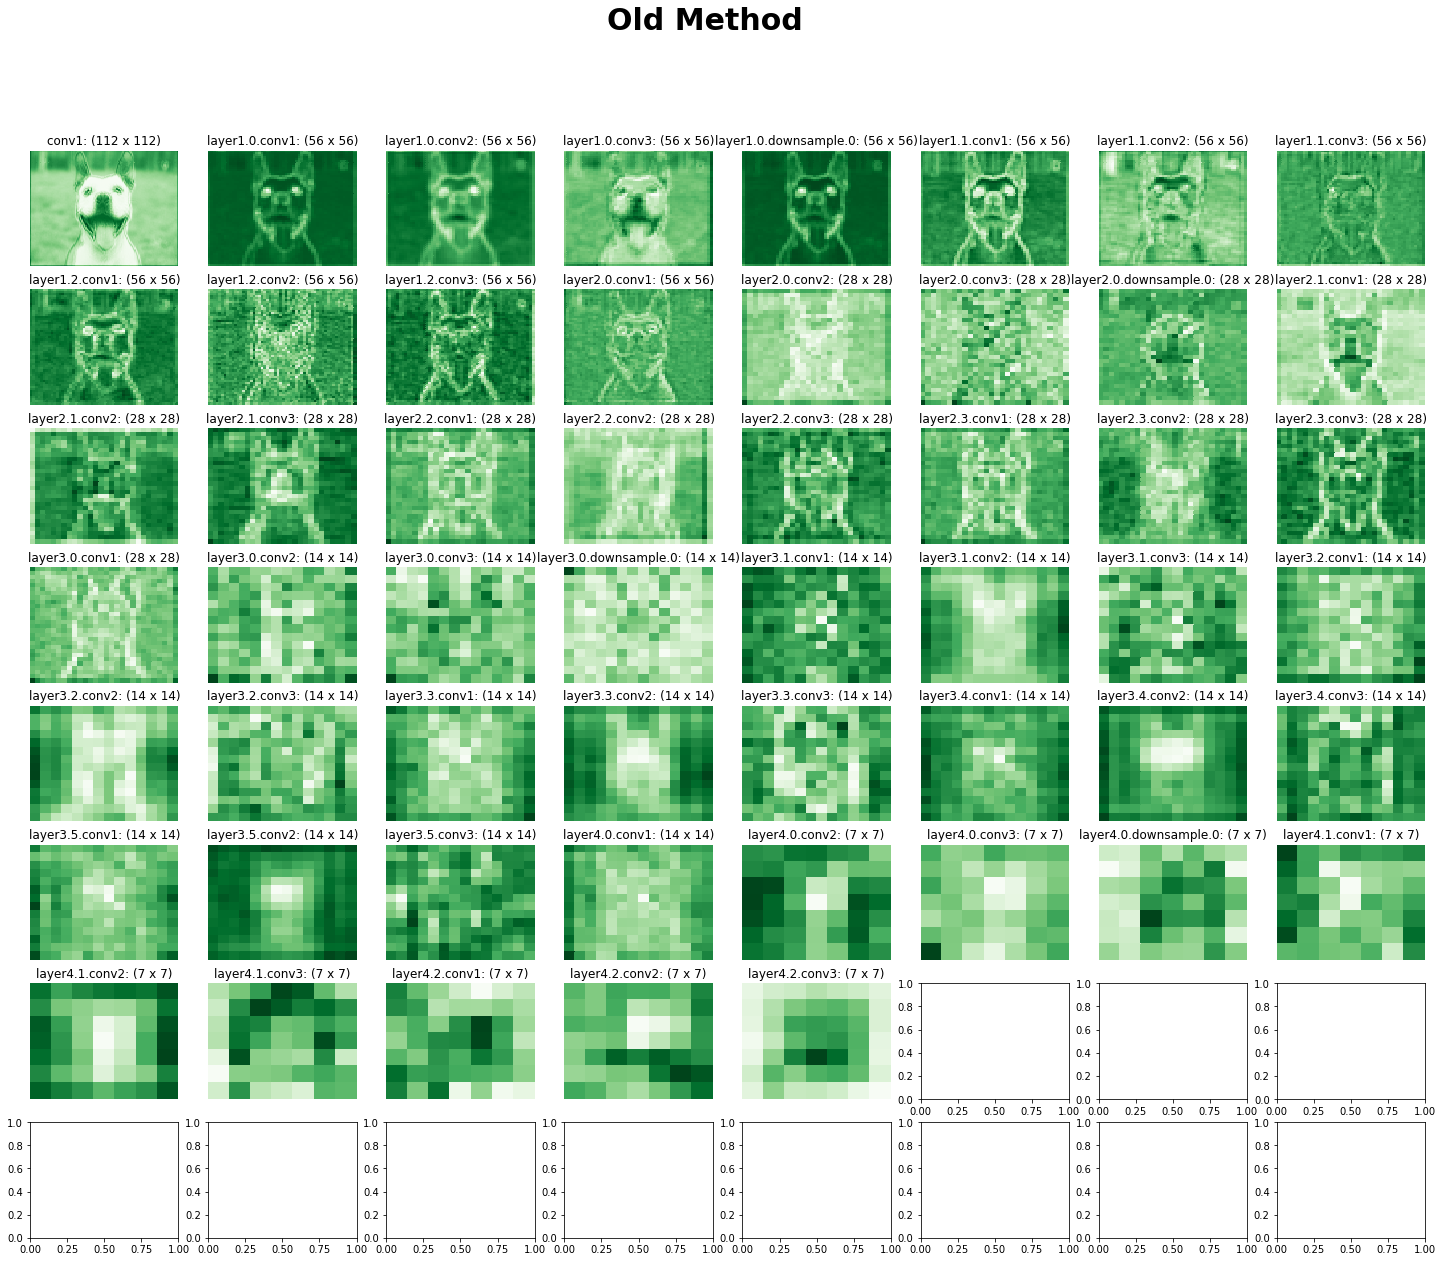

In [ ]:
start_time = time.time()
old_visualize_feature_map(model, image)
end_time = time.time()

execution_time = end_time - start_time
print(f'Execution time: {execution_time} seconds')

## 5. More Examples

## Example 1

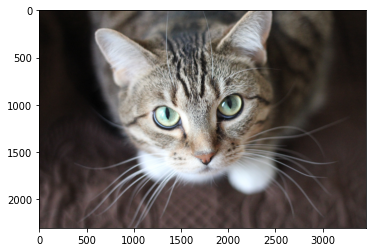

In [ ]:
image = Image.open(str('/content/cat.jpg'))
plt.imshow(image)

In [ ]:
image = transform(image)
image = image.unsqueeze(0)
image = image.to(device)

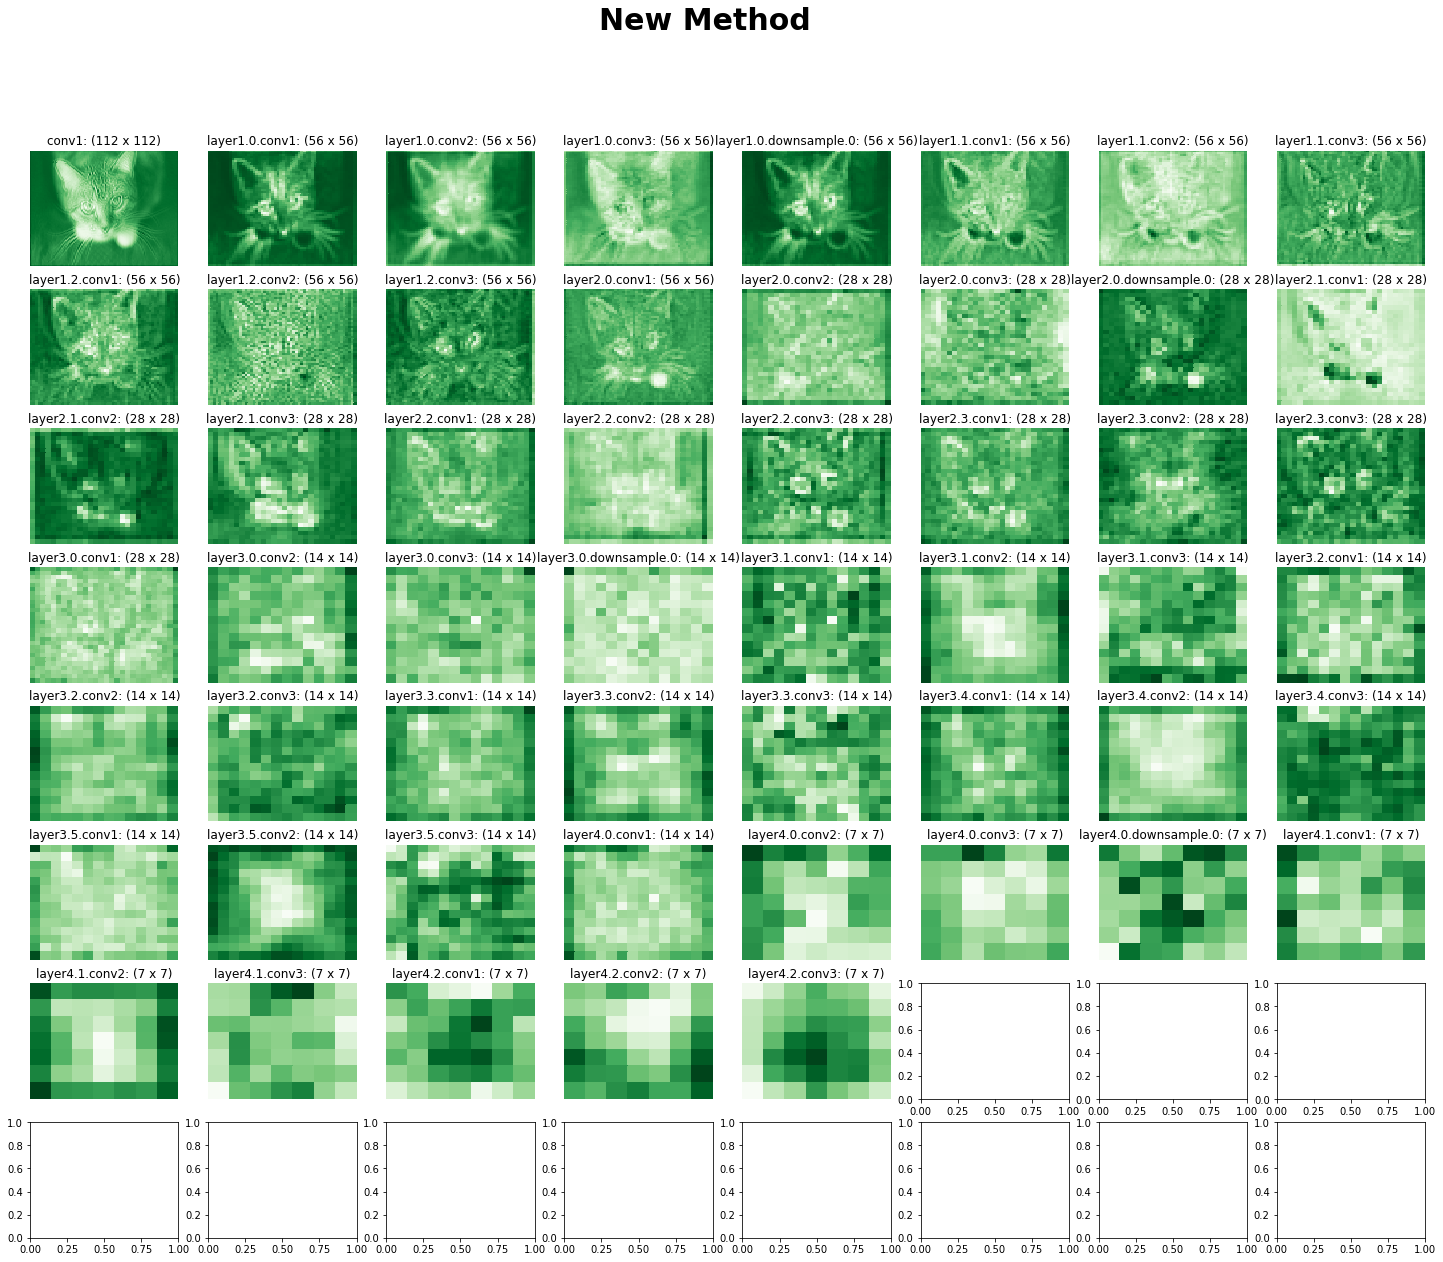

In [ ]:
new_visualize_feature_map(model, conv_name_layers, image)

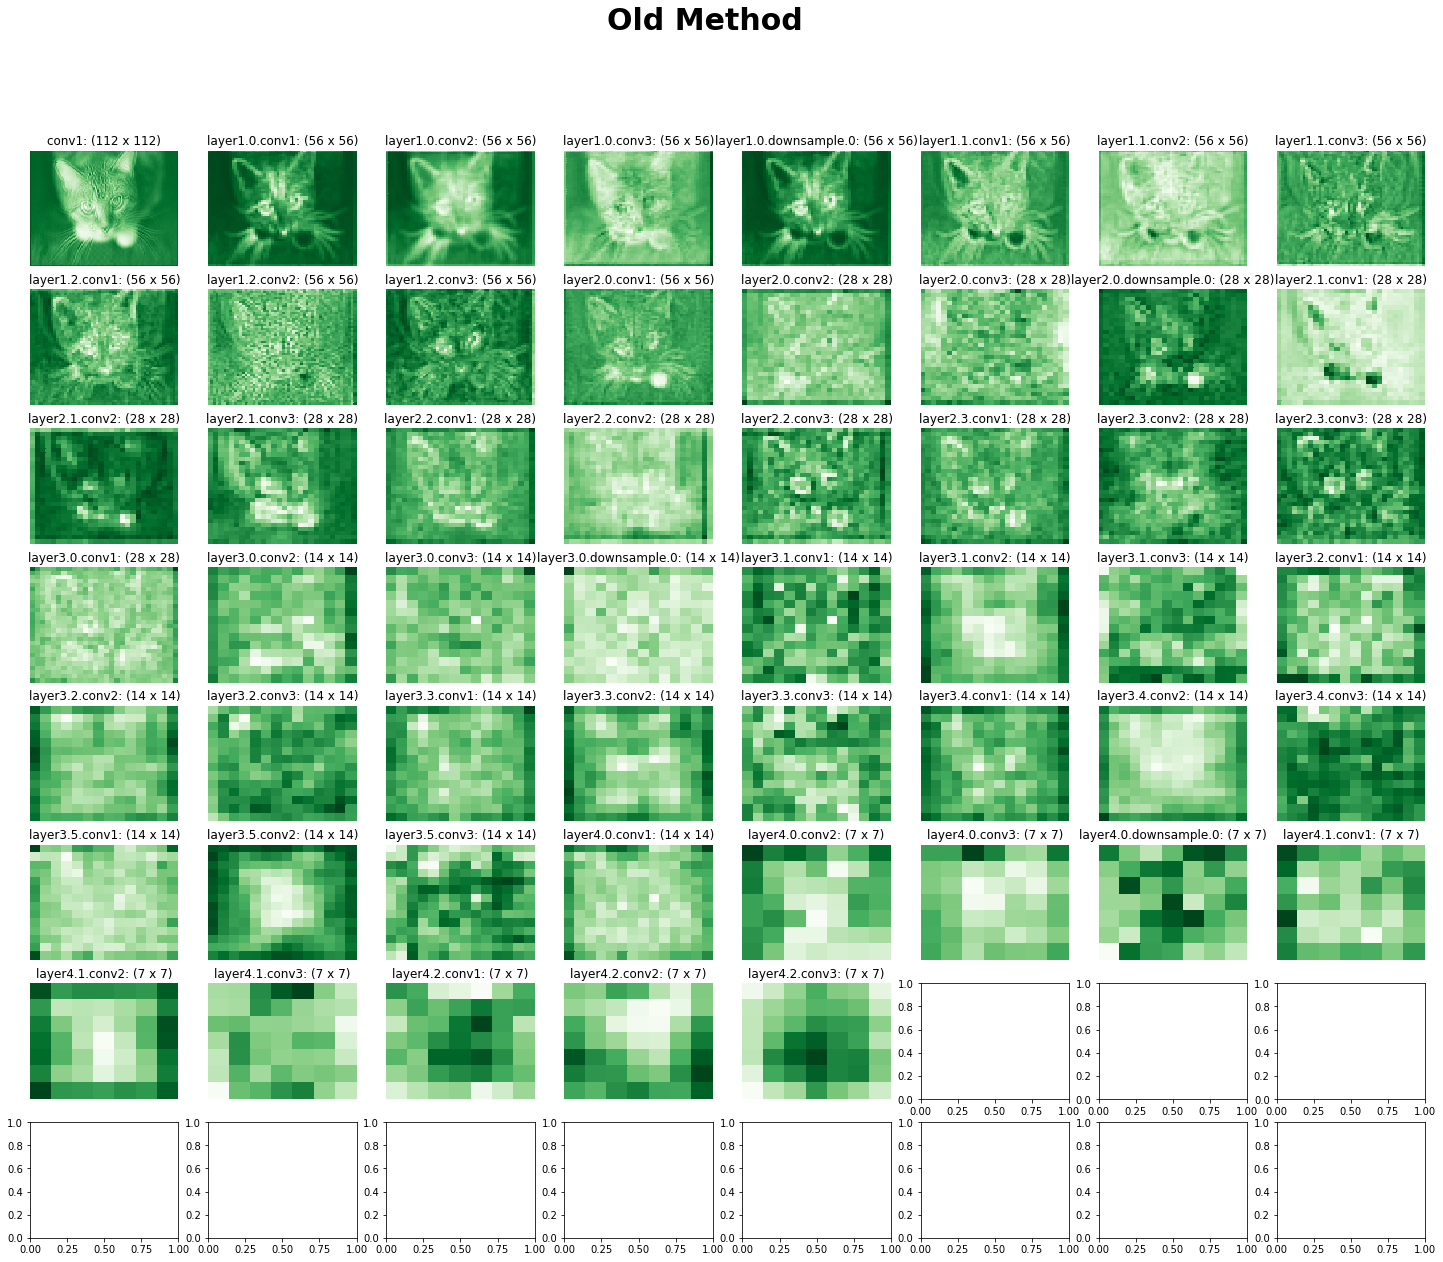

In [ ]:
old_visualize_feature_map(model, image)

## Example 2

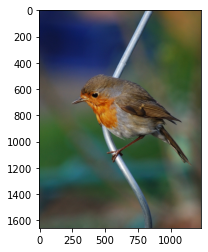

In [ ]:
image = Image.open(str('/content/bird.jpg'))
plt.imshow(image)

In [ ]:
image = transform(image)
image = image.unsqueeze(0)
image = image.to(device)

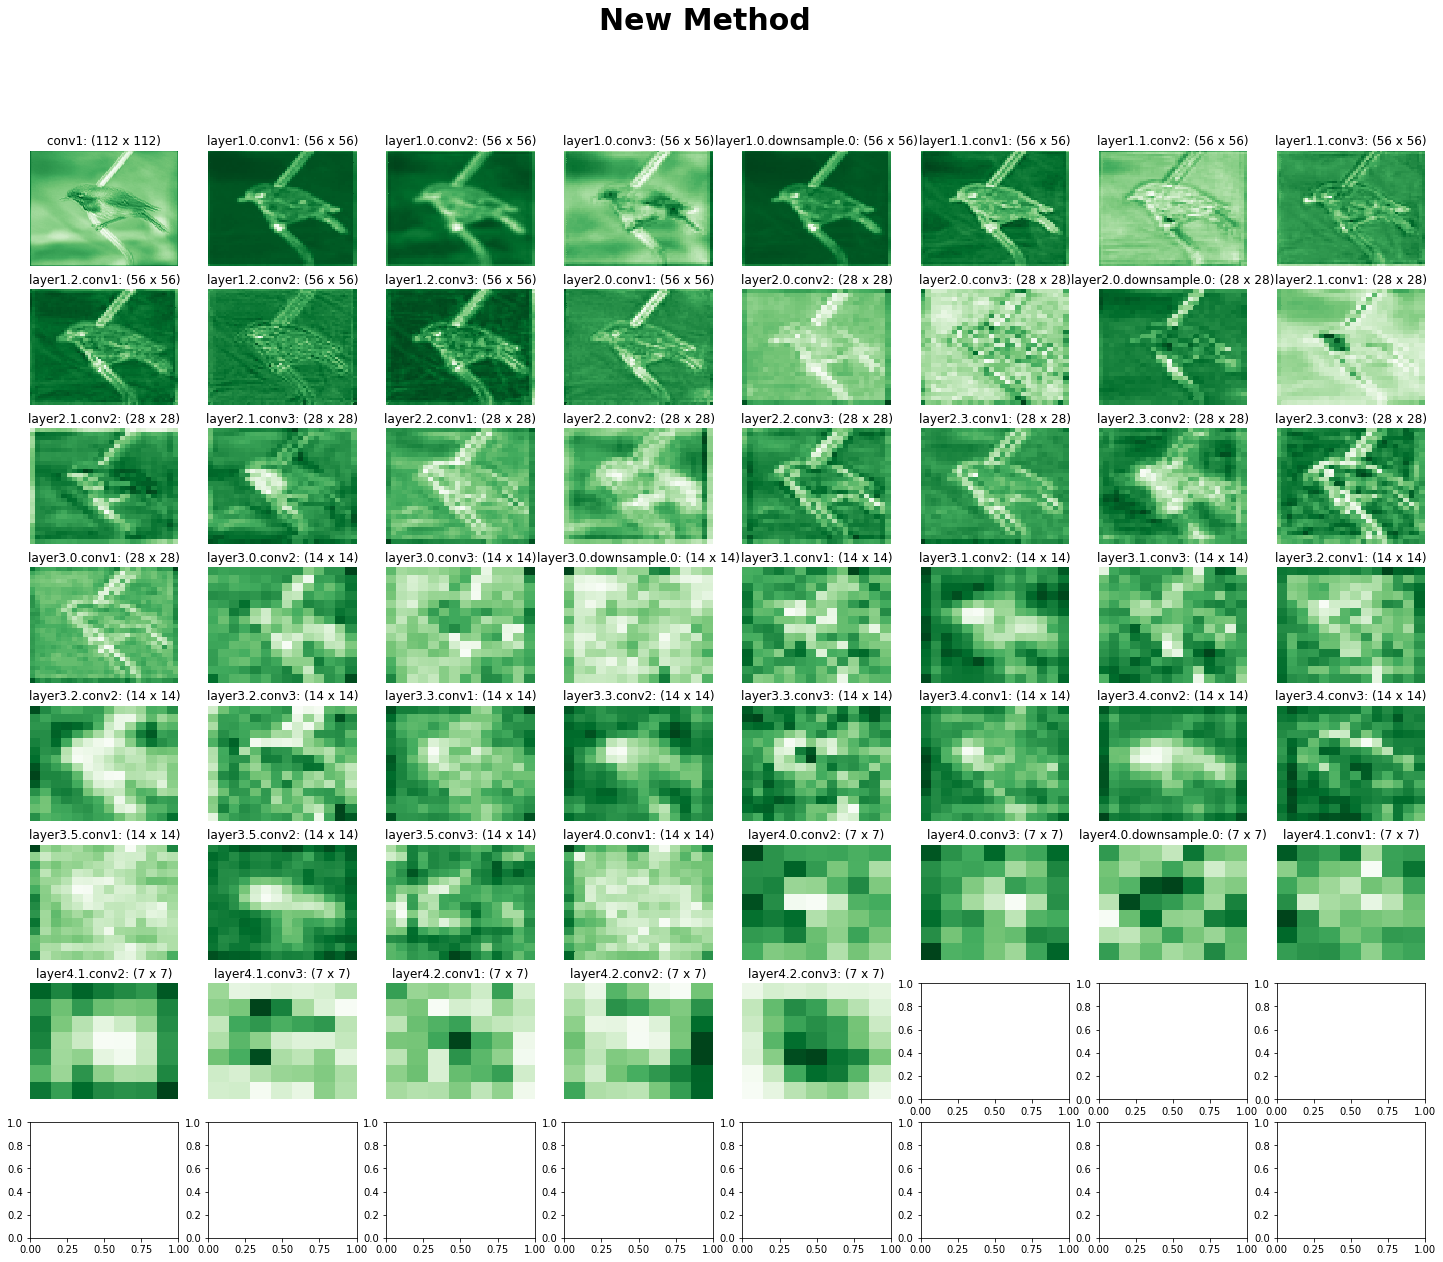

In [ ]:
new_visualize_feature_map(model, conv_name_layers, image)

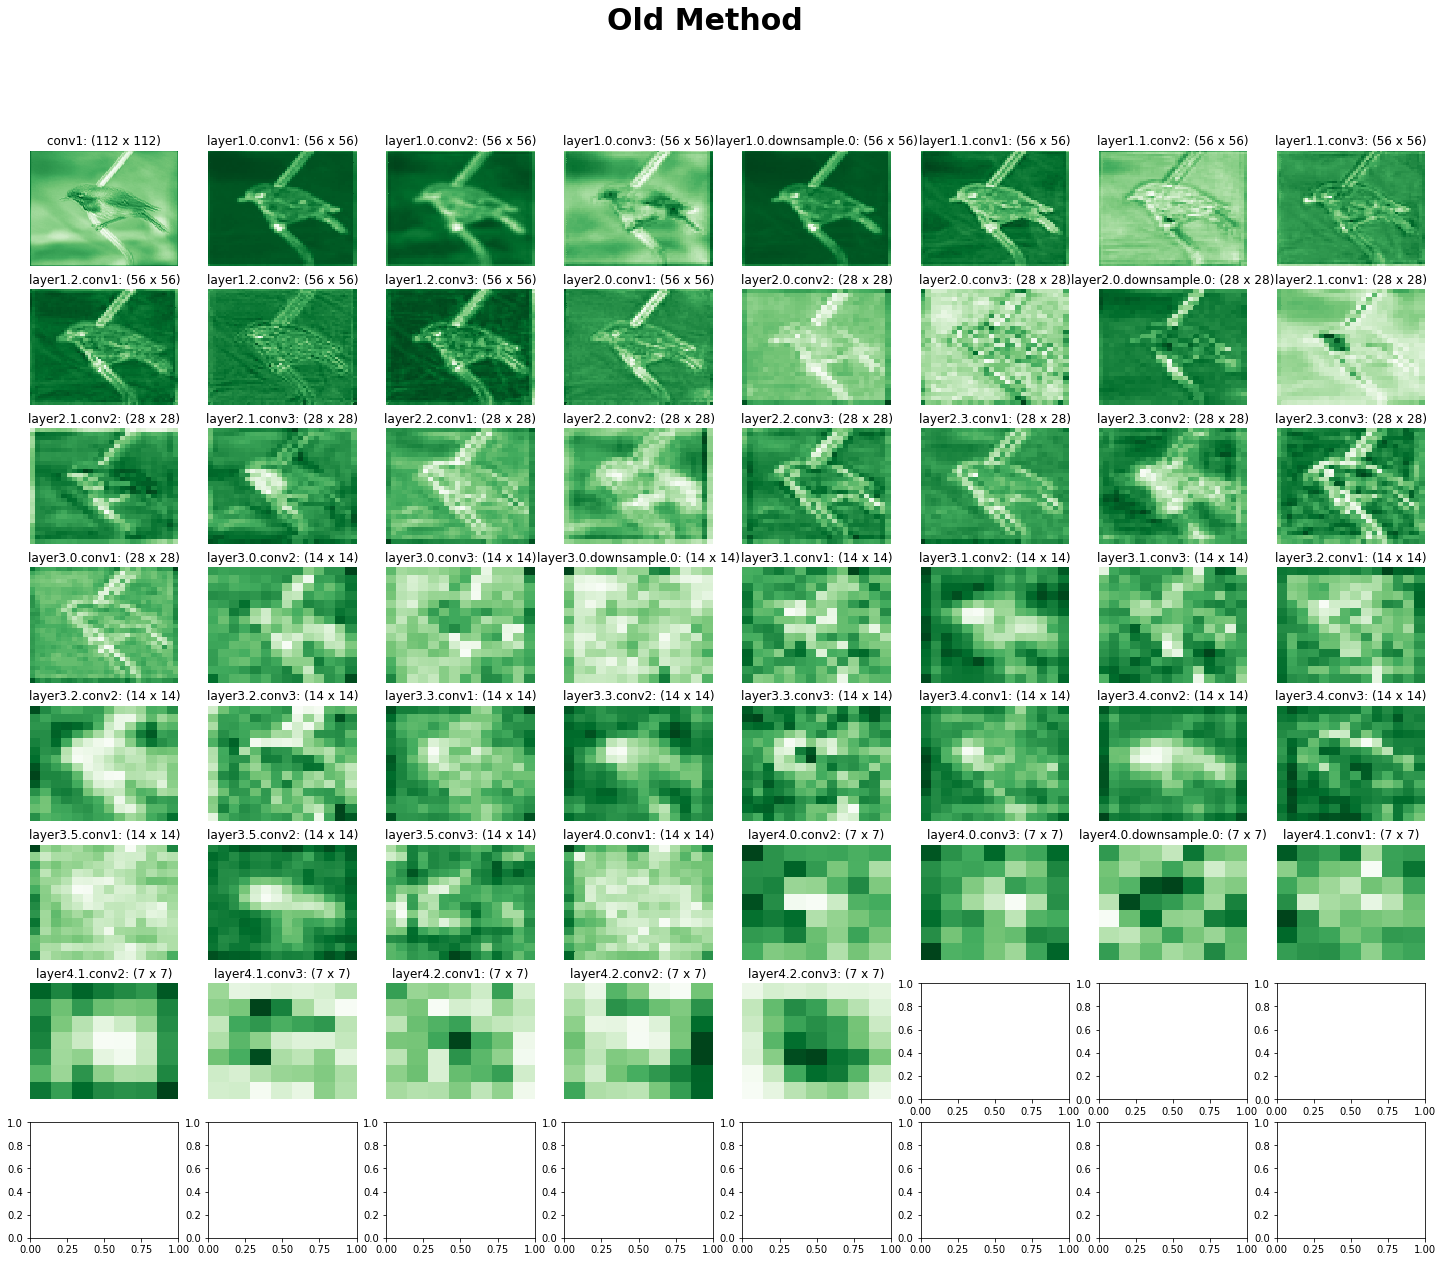

In [ ]:
old_visualize_feature_map(model, image)